In [1]:
#This project aims to build a linear regression model that can predict housing
#prices in a particular area. The dataset used for this project is the &quot;Boston
#Housing&quot; dataset which contains information about various housing factors such
#as crime rate, number of rooms, etc. This project includes data preprocessing,
#data visualization, and prediction using linear regression.




import numpy as np
import pandas as pd

In [2]:
#The first step in data preprocessing is to load the dataset into a pandas
#dataframe.

HS=pd.read_csv('housing.csv')

In [3]:
HS

,INDEX,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#The next step is to check for any missing or null values in the dataset.

print(HS.isnull().sum())

INDEX       0
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64


In [5]:
print(HS.isnull())

     INDEX   CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

       TAX  PTRATIO      B  LSTAT   MEDV  
0    False    False  False  Fals

In [6]:
print(HS.isnull().any().any())

True


In [7]:
HS=HS.dropna()

In [8]:
print(HS.isnull().sum())

INDEX      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [9]:
HS

,INDEX,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [10]:
print(HS.isnull().sum())

INDEX      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [11]:
HS.columns

Index(['INDEX', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
#The dataset is then split into the feature set and the target set.

Target = HS['MEDV']

In [13]:
Feature = HS[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [14]:
#The feature set is normalized using the StandardScaler from the scikit-learn
#library.

import sklearn

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaling = MinMaxScaler()

In [18]:
scaling.fit_transform(Feature[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

array([[0.        , 0.18      , 0.06781525, ..., 0.28723404, 1.        ,
        0.0994492 ],
       [0.00210738, 0.        , 0.24230205, ..., 0.55319149, 1.        ,
        0.22674419],
       [0.00210538, 0.        , 0.24230205, ..., 0.55319149, 0.98973725,
        0.07037944],
       ...,
       [0.00546574, 0.        , 0.42045455, ..., 0.89361702, 1.        ,
        0.11964504],
       [0.01036824, 0.        , 0.42045455, ..., 0.89361702, 0.99130062,
        0.14534884],
       [0.00412541, 0.        , 0.42045455, ..., 0.89361702, 1.        ,
        0.18818849]])

In [19]:
import matplotlib.pyplot as plt

In [20]:
#Variables
#There are 14 attributes in each case of the dataset. They are:
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

In [21]:
HD=HS['MEDV']

In [22]:
HD

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 452, dtype: float64

Text(0, 0.5, 'Values')

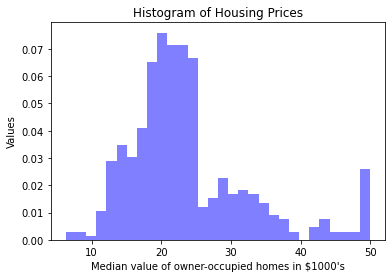

In [23]:
#The first visualization is a histogram of the target variable, which is the housing
#price.


plt.hist(HD, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Histogram of Housing Prices')
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel('Values')

In [24]:
HD.describe()

count    452.000000
mean      23.750442
std        8.808602
min        6.300000
25%       18.500000
50%       21.950000
75%       26.600000
max       50.000000
Name: MEDV, dtype: float64

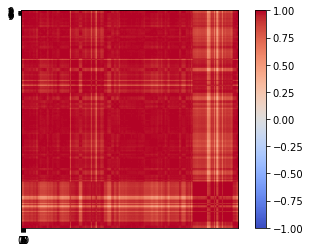

In [25]:
#The second visualization is a correlation matrix of all the features in the dataset.
#This helps us to identify the features that are highly correlated with the target
#variable.

CRM = np.corrcoef(Feature)
plt.imshow(CRM, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

In [26]:
SCFIT = scaling.fit_transform(Feature[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [27]:
HCRD = HS[['CRIM','TAX','RAD','DIS','RM']]

Text(0, 0.5, "Median value of owner-occupied homes in $1000's values")

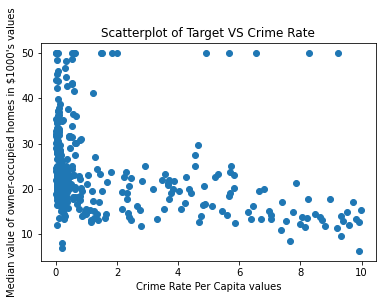

In [28]:
#The third visualization is a scatter plot between the highly correlated features and
#the target variable. This helps us to identify any linear relationships between the
#features and the target variable.

plt.scatter(HS['CRIM'],Target)
plt.title('Scatterplot of Target VS Crime Rate')
plt.xlabel('Crime Rate Per Capita values')
plt.ylabel("Median value of owner-occupied homes in $1000's values")

Text(0, 0.5, "Median value of owner-occupied homes in $1000's values")

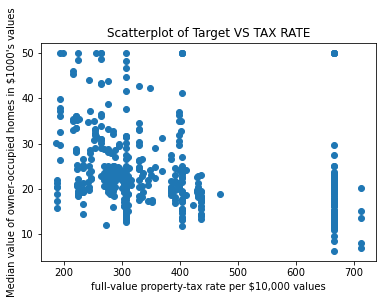

In [29]:
plt.scatter(HS['TAX'],Target)
plt.title('Scatterplot of Target VS TAX RATE')
plt.xlabel('full-value property-tax rate per $10,000 values')
plt.ylabel("Median value of owner-occupied homes in $1000's values")

Text(0, 0.5, "Median value of owner-occupied homes in $1000's values")

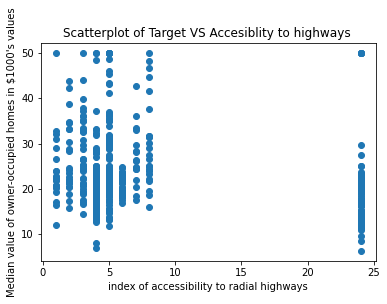

In [30]:
plt.scatter(HS['RAD'],Target)
plt.title('Scatterplot of Target VS Accesiblity to highways ')
plt.xlabel('index of accessibility to radial highways')
plt.ylabel("Median value of owner-occupied homes in $1000's values")

Text(0, 0.5, "Median value of owner-occupied homes in $1000's values")

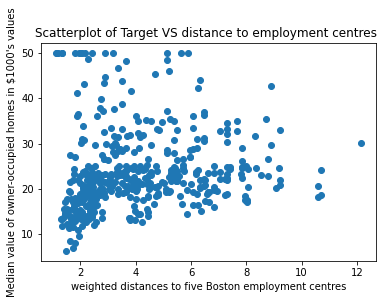

In [31]:
plt.scatter(HS['DIS'],Target)
plt.title('Scatterplot of Target VS distance to employment centres ')
plt.xlabel('weighted distances to five Boston employment centres')
plt.ylabel("Median value of owner-occupied homes in $1000's values")

Text(0, 0.5, "Median value of owner-occupied homes in $1000's values")

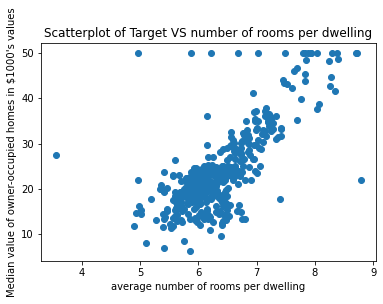

In [32]:
plt.scatter(HS['RM'],Target)
plt.title('Scatterplot of Target VS number of rooms per dwelling')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's values")

In [33]:
#The feature set and the target set are split into training and testing sets.

from sklearn.model_selection import train_test_split

In [34]:
#The linear regression model is trained on the training set.

X_train, X_test, y_train, y_test = train_test_split(Feature,Target, test_size=0.2)

In [35]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
467,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24,666.0,20.2,331.29,21.32
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90
443,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24,666.0,20.2,386.73,18.85
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3,402.0,17.0,384.30,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277.0,18.6,385.81,9.38
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8,307.0,17.4,387.38,3.13
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4,437.0,21.2,392.11,17.19


In [36]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
467,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24,666.0,20.2,331.29,21.32
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90
443,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24,666.0,20.2,386.73,18.85
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3,402.0,17.0,384.30,4.45


In [37]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24,666.0,20.2,50.92,18.13
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5,403.0,14.7,297.09,11.10
447,9.92485,0.0,18.10,0.0,0.740,6.251,96.6,2.1980,24,666.0,20.2,388.52,16.44
347,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4,351.0,17.9,392.43,6.36
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5,403.0,14.7,395.11,11.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5,187.0,17.0,384.46,4.50
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1,335.0,19.7,389.85,5.89
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32


In [38]:
y_train

467    19.1
101    26.5
259    30.1
443    15.4
200    32.9
       ... 
213    28.1
226    37.6
108    19.8
127    16.2
181    36.2
Name: MEDV, Length: 361, dtype: float64

In [39]:
y_test

455    14.1
168    23.8
447    12.6
347    23.1
164    22.7
       ... 
353    30.1
225    50.0
349    26.6
163    50.0
395    13.1
Name: MEDV, Length: 91, dtype: float64

In [40]:
#The model is then used to predict the housing prices for new data points.
#● Conclusion:

from sklearn.linear_model import LinearRegression

In [41]:
CLFLR = LinearRegression()

In [42]:
CLFLR.fit(X_train,y_train)

LinearRegression()

In [43]:
CLFLR.predict(X_test)

array([16.58886292, 25.9715535 , 19.40298677, 25.17073899, 24.04689765,
       23.73851764, 20.02435252, 32.26460698, 29.88688669, 19.90018078,
       18.9263851 , 23.86593762, 22.69884974, 45.22702641, 24.62804184,
       32.01447009, 21.89534623, 25.03882432, 37.61171888, 18.54503511,
       35.59419257, 27.93571332, 18.64001629, 23.82606105, 30.24726306,
       26.43157993, 33.21779454, 14.71551894, 31.73160926, 20.76710309,
       14.77156055, 24.22389374, 21.20406564, 29.95380604, 26.70740761,
       29.47671232, 18.51025085, 13.66287679, 15.55261043, 23.98425704,
       20.71821966, 25.67689535, 17.35269593, 17.79381427, 16.82331765,
       19.72325639, 21.01614357, 22.06371872, 33.22177786, 17.62356084,
       25.83094154, 22.87231897, 24.68308116, 31.67495414, 21.46331761,
       11.88108653, 24.07664137, 13.71828841, 25.08060939, 28.55900108,
       28.33491753, 19.96545031, 24.93113455, 11.28498462, 19.85579555,
       27.98545121, 24.3733496 , 20.17627923, 27.77914438, 27.43

In [64]:
y_test

455    14.1
168    23.8
447    12.6
347    23.1
164    22.7
       ... 
353    30.1
225    50.0
349    26.6
163    50.0
395    13.1
Name: MEDV, Length: 91, dtype: float64

In [48]:
CLFLR.score(X_test,y_test)

0.6933134541870565

In [49]:
#Accuracy of Data is ~ to 70%

In [59]:
#The model is then evaluated on the testing set using the mean squared error
#(MSE) and the R-squared score.

from sklearn.metrics import mean_squared_error
y_train

467    19.1
101    26.5
259    30.1
443    15.4
200    32.9
       ... 
213    28.1
226    37.6
108    19.8
127    16.2
181    36.2
Name: MEDV, Length: 361, dtype: float64

In [60]:
MSEOD = mean_squared_error(CLFLR.predict(X_test),y_test)
print("Mean squared error:", MSEOD)

Mean squared error: 20.794658843881336


In [61]:
from sklearn.metrics import r2_score

In [63]:
RSQES = r2_score(CLFLR.predict(X_test),y_test)
print("R squared error:", RSQES)

R squared error: 0.5433107210858454


In [ ]:
#In this project, we have successfully built a linear regression model that can
#predict housing prices in a particular area. The model was trained and tested on

#the &quot;Boston Housing&quot; dataset using data preprocessing, data visualization, and
#linear regression techniques.